# Decision Tree Classification on Marketing Data

A decision tree classifier is a supervised learning method used for classification (and regression). In this playbook, you will use a decision tree for binary classification. The dataset ([source](https://www.kaggle.com/akram24/social-network-ads)) that will be used consists of 400 records of data about users, such as age, estimated salary and gender, and how they reacted on an advertisment. You will predict whether or not a user will react positively on an advertisment, i.e. buy the product.

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## 1. Load your data

In [4]:
# Load data
df = pd.read_csv('social_network_ads.csv', index_col='UserID')
df.head()

,Gender,Age,EstimatedSalary,Purchased
UserID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


## 2. Data Preprocessing

In [4]:
# Convert 'Purchased' to boolean
df['Purchased'] = df['Purchased'].astype('bool')

In [5]:
# Inspect null values
print(df.isnull().sum())

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [6]:
# Inspect variables (Gender and Purchased)
df.describe(include=['object','bool'])

,Gender,Purchased
count,400,400
unique,2,2
top,Female,False
freq,204,257


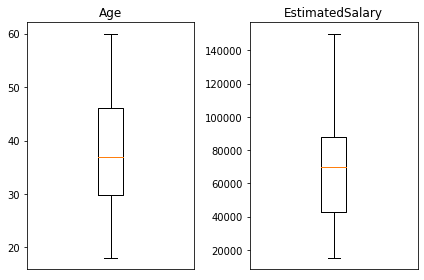

In [7]:
# Inspect variables (Age and EstimatedSalary)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(df['Age'])
ax1.xaxis.set_visible(False)
ax1.set_title('Age')

ax2.boxplot(df['EstimatedSalary'])
ax2.xaxis.set_visible(False)
ax2.set_title('EstimatedSalary')


fig.tight_layout()
fig.show()

In [6]:
# Split the data into X and y
input_cols = ['Gender', 'Age', 'EstimatedSalary']
output_col = ['Purchased']
X = df[input_cols]
y = df[output_col]

# Use an encoder to encode the categorical values 'Male' and 'Female'
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)

# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

## 3. Build your Decision Tree Classifier

For the decision tree, you can choose between either **gini impurity** or **entropy** as the classification criterion:  
The **gini impurity** for a binary split on attribute A, which divides set $S$ into sets $S_{1}$ and $S_{2}$, is as follows:
$$ Gini_{A}(S) = \dfrac{|S_{1}|}{|S|} * Gini(|S_{1}|) +  \dfrac{|S_{2}|}{|S|} * Gini(|S_{2}|)$$  
with $ Gini(|S_{i}|) = 1 - p_{1}^{2} - p_{2}^{2}$

The **entropy** for the same sort of split is as follows:
$$ Entropy_{A}(S) = -p_{1}*log_{2}(p_{1}) - p_{2}*log_{2}(p_{2})$$  
with $p_{i} = \dfrac{|S_{i}|}{|S|}$

In [8]:
# Choose the criterion and max depth of the tree you want to use
CRITERION = 'gini'
MAX_DEPTH = 3

# Set up the DT classifier
dt_clf = DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH, random_state=43)

# Train the DT classifier
_=dt_clf.fit(X_train, y_train)

# Evaluate the DT on the test set
y_pred = dt_clf.predict(X_test)
print(f'Model accuracy score with criterion {CRITERION} index: {accuracy_score(y_test, y_pred):.4f}')

Model accuracy score with criterion gini index: 0.9000


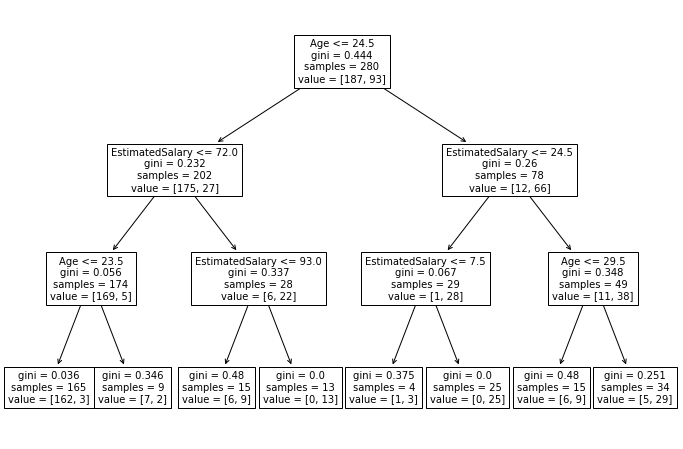

In [9]:
# Possibly visualize the DT
plt.figure(figsize=(12,8))
_=tree.plot_tree(dt_clf.fit(X_train, y_train), feature_names=input_cols, fontsize=10) 

As you can see in this decision tree, gender is of no importance. You can also check the importance of different features using `dt_clf.feature_importances_`:

In [10]:
ft_importance = dt_clf.feature_importances_
for i, score in enumerate(ft_importance):
    print(f'{input_cols[i]}: {score:.3f}')

Gender: 0.000
Age: 0.652
EstimatedSalary: 0.348
